In [76]:
# Importing Libraries
import tensorflow as tf # creating nn and machine learning functions
import numpy as np # LinearAlgebra operations
from tensorflow import keras # Easy for creating nn
!pip install matplotlib # Installing Visualization library
import matplotlib.pyplot as plt # Importing Visualization library
import pandas as pd # For data manipulation
print(tf.__version__) # Shows tensorflow version
import seaborn as sns

1.14.0


In [77]:
# Loading data in fashion_mnist
fashion_mnist = keras.datasets.fashion_mnist

# X = images
# y = labels

# Tensorflow gives us data in train and test format otherwise we have to split the data!!
(train_X, train_y),(test_X, test_y) = fashion_mnist.load_data()
print("Dataset Loaded GLHF!!")

Dataset Loaded GLHF!!


In [0]:
# Different types of classes in fashion mnist!!
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [79]:
# Shapes of training and testing set this is used during our model creation
print("train_X.shape",train_X.shape) # op shows (60000,28,28) ie. 60000 images of 28x28 pixels
print("test_X.shape",test_X.shape)
print("train_y.shape",train_y.shape) # op show (60000) ie. 60000 labels for respective images
print("test_y.shape",test_y.shape)

train_X.shape (60000, 28, 28)
test_X.shape (10000, 28, 28)
train_y.shape (60000,)
test_y.shape (10000,)


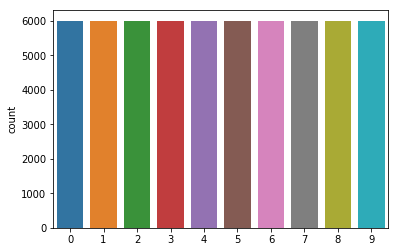

In [80]:
## lets visualize how many image for each class
sns.countplot(train_y)

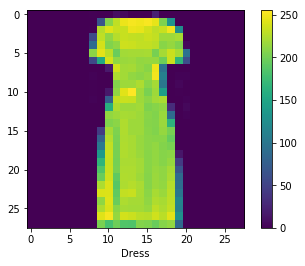

In [81]:
# Visualizing the data using matplotlib
# Crosscheck whether our labels are in sync with images ;p
plt.figure()
plt.imshow(train_X[50])
plt.xlabel(class_names[train_y[50]])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
## Lets make a validation set to optimize our model during training

# Using handy function in sklearn we can easily spilt our data

# random_state = 7 mean every time we split the data it will be in same set
# test_size = 0.2 we will take 0.2% of our training data!
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(train_X,train_y,test_size=0.2, random_state=7)

In [0]:
# Scaling the values between 0 to 1 instead 0 to 255
# This is normalizing the data.!! Important stuff !!
x_train = x_train / 255.0
x_val = x_val/255.0
test_X = test_X / 255.0

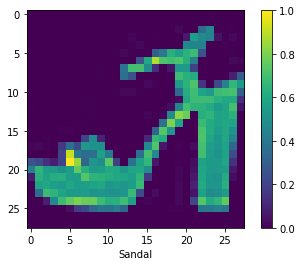

In [84]:
# As we can see the values on right bar are between 0 and 1 instead 0 and 255 :D
plt.figure()
plt.imshow(x_train[125])
plt.xlabel(class_names[y_train[125]])
plt.colorbar()
plt.grid(False)
plt.show()

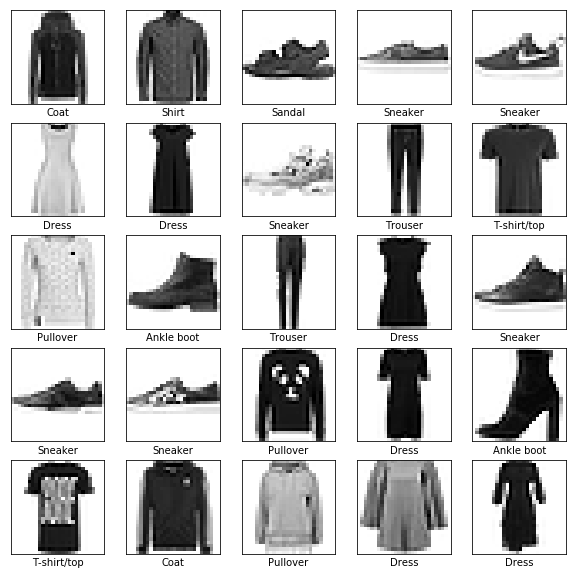

In [85]:
# Displaying first 25 images and verify its in correct format
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap=plt.cm.binary)  # cmap = plt.cm.binary -> B/W image
    plt.xlabel(class_names[y_train[i]]) # we convert number to class name to identify the images easily

In [86]:
## we have to reshape our data in 2D array with single channel or depth
# we have single depth or channel ie. A monochrome(single color)image
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_val = x_val.reshape(x_val.shape[0],28,28,1)
test_X = test_X.reshape(test_X.shape[0],28,28,1)

## One more time we will check our data shape
print("x_train.shape",x_train.shape)
print("y_train.shape",y_train.shape)
print("x_val.shape",x_val.shape)
print("y_val.shape",y_val.shape)
print("test_X.shape",test_X.shape)
print("test_X.shape",test_X.shape)

x_train.shape (48000, 28, 28, 1)
y_train.shape (48000,)
x_val.shape (12000, 28, 28, 1)
y_val.shape (12000,)
test_X.shape (10000, 28, 28, 1)
test_X.shape (10000, 28, 28, 1)


Our data is actually in 2D array so we dont have to convert it otherwise we have to convert our 1D data to 2D data !!

`X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)`

`X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)`

`X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)`


In [90]:
# Creating model using Keras in tensorflow..!!

# We are using sequential model ->  linear stacks of layers

'''
Here we are using Convolution Neural Network (CNN)

Conv2D -> Convolution layer (32 = filters, kernel_size == filters_size = (3,3)
                             activation_function = relu ie. g(z) = max{0, z} makes non-linear functions
                             we will initalize our kernels with 1's
                             Shape of our 2d image (28,28,1)
                             )

MaxPool2D -> Max Pooling layer calculate the maximum value for each patch of the feature map.
             Max pooling basically downsample our image for faster computation.
             (2,2) we are halving our image by 2
             as we can see in model summary we go from 26 to 13
## extra ## Average Pooling: Calculate the average value for each patch on the feature map.


Dropout -> ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random
           units are not considered during a particular forward or backward pass.
           why dropout???? -> to prevent over-fitting
           
           
Flatten -> https://i.stack.imgur.com/lmrin.png 
            simple explaination for flatten
            Just flattens our image 
            
Dense -> Densely-connected NN layer


activation=tf.nn.softmax -> turns numbers aka logits into probabilities that sum to one

'''

model = keras.Sequential([
    
    keras.layers.Conv2D(32, kernel_size=(3, 3),
                            activation=tf.nn.relu,
                            kernel_initializer='he_normal',
                            input_shape=(28, 28, 1)),
    
    keras.layers.MaxPool2D((2,2)),
    
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(64, kernel_size=(3, 3),
                            activation=tf.nn.relu),
    
    keras.layers.MaxPool2D((2,2)),
    
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(128, kernel_size=(3, 3),
                            activation=tf.nn.relu),
    
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(256, kernel_size=(3, 3),
                            activation=tf.nn.relu),
    
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dropout(0.2),
                                                    
    keras.layers.Dense(128,activation=tf.nn.relu),
    
    keras.layers.Dense(64,activation=tf.nn.relu),
                                                   
    keras.layers.Dense(10,activation=tf.nn.softmax) # softmax returns an array of 10 probability scores that sum to 1
# Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 128)        

In [0]:
####
'''
Loss function  - measure how accurate our model is during training. 
We want to minimize the loss function to reach optimal solution.

Optimizer - updates the model based on data and loss value -> eg. gradient descent, adam, RMSProp, Adagrad !!

Metrics - monitor training and testing steps 

Accuracy - monitors how much of our data is accurately classified

'''
####
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [92]:
# the model is "fit" to the training data 

# Epochs - how many time to go through data!

history = model.fit(x_train,y_train,
                    batch_size = 100,
                    validation_data = (x_val,y_val),
                    epochs=30,
                   verbose = 1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 7s 149us/sample - loss: 0.7150 - acc: 0.7254 - val_loss: 0.4771 - val_acc: 0.8128
Epoch 2/30
48000/48000 [==============================] - 6s 133us/sample - loss: 0.4555 - acc: 0.8297 - val_loss: 0.3563 - val_acc: 0.8663
Epoch 3/30
48000/48000 [==============================] - 6s 133us/sample - loss: 0.3790 - acc: 0.8609 - val_loss: 0.3136 - val_acc: 0.8875
Epoch 4/30
48000/48000 [==============================] - 6s 131us/sample - loss: 0.3386 - acc: 0.8756 - val_loss: 0.2844 - val_acc: 0.8951
Epoch 5/30
48000/48000 [==============================] - 6s 131us/sample - loss: 0.3168 - acc: 0.8842 - val_loss: 0.2705 - val_acc: 0.9022
Epoch 6/30
48000/48000 [==============================] - 6s 131us/sample - loss: 0.2963 - acc: 0.8927 - val_loss: 0.2575 - val_acc: 0.9057
Epoch 7/30
48000/48000 [==============================] - 6s 131us/sample - loss: 0.2822 - acc: 0.8967 - val_l

In [93]:
# compare how the model performs on the test dataset

test_loss,test_acc = model.evaluate(test_X,test_y)
print("test accuracy = ",test_acc)

10000/10000 [==============================] - 1s 100us/sample - loss: 0.2491 - acc: 0.9162
test accuracy =  0.9162


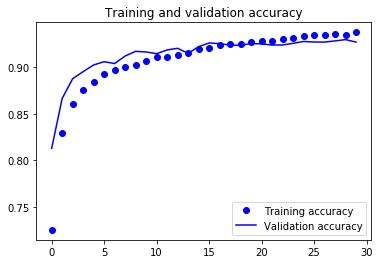

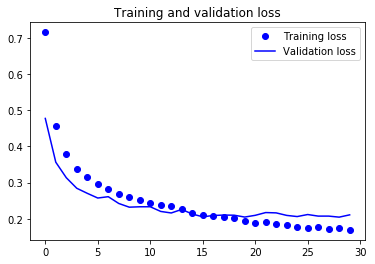

In [94]:
## Plotting our magical models accuracy and loss

import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
## Lets make predictions :D

# model.predict with image as test_X we can predict and classify the data properly!!
predictions = model.predict(test_X)

In [96]:
# This predictions values are too much of hassel lets get argmax function to get best value out of all 10.
predictions[0]

array([5.7213477e-14, 8.3991671e-18, 2.7198590e-19, 1.3782761e-15,
       1.9111813e-17, 1.7555898e-07, 8.7475693e-15, 1.4008219e-06,
       1.4978155e-18, 9.9999845e-01], dtype=float32)

In [0]:
# Best value out of all !!
x = np.argmax(predictions[0])

In [98]:
# Crosscheck whether our model accurately classify or not!
if (x == test_y[0]):
    print("correctly classified xD")
else:
    print("incorrectly classified ;-; ")

correctly classified xD


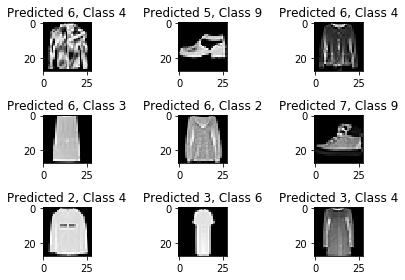

In [99]:
predicted_classes = model.predict_classes(test_X)
# incorrect images
incorrect = np.nonzero(predicted_classes!=test_y)[0]
## Incorrect classification ;-;
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_y[incorrect]))
    plt.tight_layout()

We will use this image


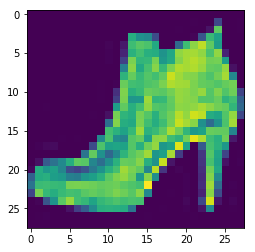

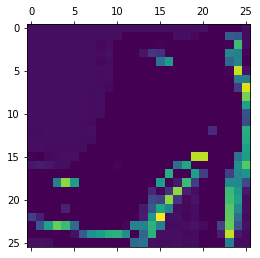

In [100]:
## https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0
## learnt this from above link

print("We will use this image")
test_im = x_train[200]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

layer_outputs = [layer.output for layer in model.layers[:5]] 
# Extracts the outputs of the top 12 layers
activation_model = keras.models.Model(inputs=model.inputs, outputs=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

In [0]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name)

In [102]:
print(layer_names)

['conv2d_15', 'max_pooling2d_12', 'dropout_15', 'conv2d_16', 'max_pooling2d_13', 'dropout_16', 'conv2d_17', 'dropout_17', 'conv2d_18', 'dropout_18', 'flatten_3', 'dropout_19', 'dense_9', 'dense_10']


In [0]:
images_per_row = 16

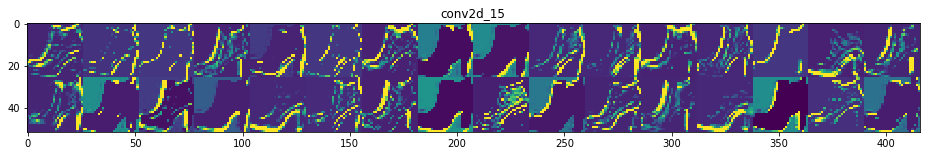

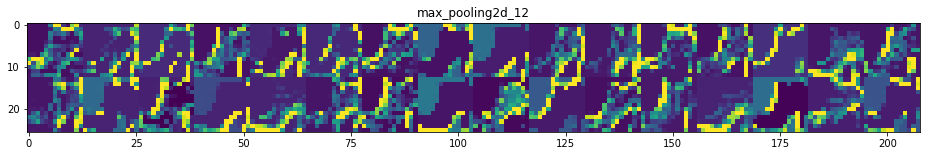

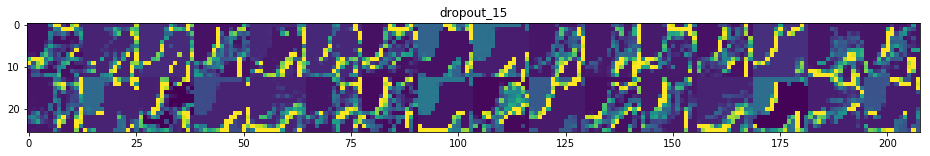

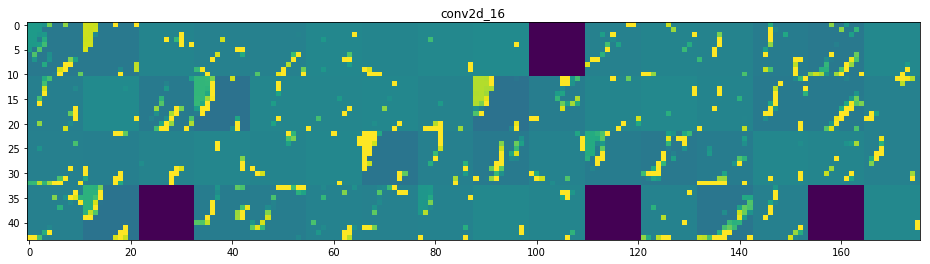

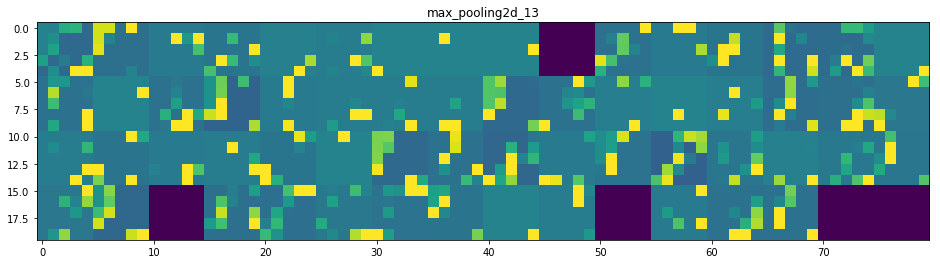

In [106]:
##https://github.com/gabrielpierobon/cnnshapes/blob/master/README.md

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :,col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')